# Name: Francis Kwame Segbe
# Assignment Number: Four (4)

In [59]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
mdata = sm.datasets.macrodata.load_pandas().data
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import coint
from itertools import combinations
import warnings

In [60]:
import statsmodels
print(statsmodels.__version__)

0.10.0


In [61]:
#Granger Causualty
import numpy as np
from matplotlib import pyplot
from pandas import DataFrame

In [62]:
# Step 1: Read the CSV files into pandas DataFrames
a = pd.read_csv(r"C:\Users\HP\Downloads\Assignment 4\A.csv", index_col=0, parse_dates=True)
b = pd.read_csv(r"C:\Users\HP\Downloads\Assignment 4\B.csv", index_col=0, parse_dates=True)
c = pd.read_csv(r"C:\Users\HP\Downloads\Assignment 4\C.csv", index_col=0, parse_dates=True)

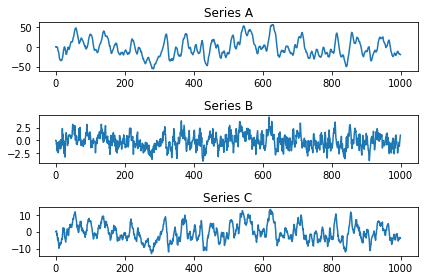

In [63]:
# This will plot each series on a new subplot
fig, axs = plt.subplots(3)

# Plot series A
axs[0].plot(a)
axs[0].set_title('Series A')

# Plot series B
axs[1].plot(b)
axs[1].set_title('Series B')

# Plot series C
axs[2].plot(c)
axs[2].set_title('Series C')

# Display the plot
plt.tight_layout()
plt.show()

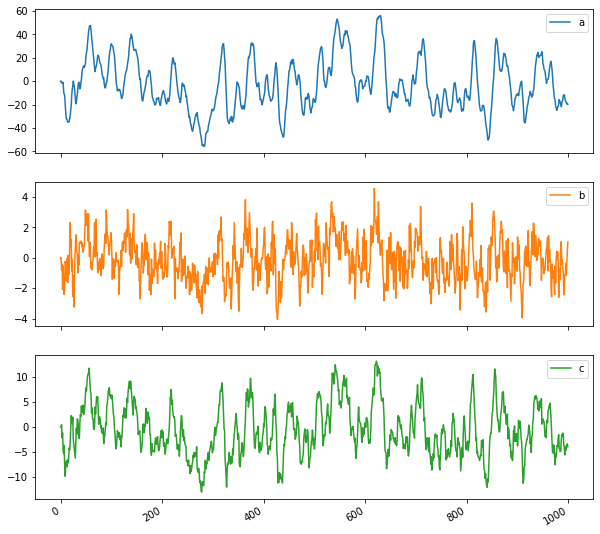

In [64]:
# Step 2: Combine the DataFrames into a single DataFrame
data = pd.concat([a, b, c], axis=1)
data.columns = ['a', 'b', 'c']
# Step 5: Plot the input data
data.plot(subplots=True, layout=(3, 1), figsize=(10, 10))
plt.show()
# Step 2: Remove the row with index 0
data = data.drop(0, axis=0)

In [65]:
data.head()

,a,b,c
1,0.000000,0.000000,0.000000
2,-1.690123,-0.809757,0.420383
3,-1.219096,-0.412396,-2.200924
4,-1.410304,-2.072510,-1.201323
5,-1.014350,-0.537330,-4.511621


In [66]:
model = VAR(data)
lag_order = model.select_order(15)
print()
print(lag_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        8.543       8.558       5130.       8.548
1       0.2964      0.3561       1.345      0.3191
2     0.03077*     0.1352*      1.031*    0.07048*
3      0.04083      0.1900       1.042     0.09756
4      0.04964      0.2435       1.051      0.1234
5      0.06037      0.2990       1.062      0.1511
6      0.07201      0.3554       1.075      0.1798
7      0.08813      0.4162       1.092      0.2129
8      0.09689      0.4697       1.102      0.2387
9       0.1014      0.5190       1.107      0.2602
10      0.1044      0.5667       1.110      0.2803
11      0.1163      0.6233       1.123      0.3091
12      0.1260      0.6778       1.134      0.3359
13      0.1290      0.7255       1.138      0.3559
14      0.1374      0.7786       1.147      0.3813
15      0.1438      0.8298       1.155      0.4047
------------------------------

The optimum lag is two (2) according to the AIC results as asteriks in row number two.

# Model fit at optimum lag order and get results

In [67]:
# !python --version

In [68]:
results = model.fit(2)
print()
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, May, 2023
Time:                     13:42:47
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.150249
Nobs:                     997.000    HQIC:                 0.0862103
Log likelihood:          -4246.44    FPE:                    1.04806
AIC:                    0.0469396    Det(Omega_mle):         1.02629
--------------------------------------------------------------------
Results for equation a
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.020089         0.032691           -0.614           0.539
L1.a          0.506964         0.029899           16.956           0.000
L1.b          0.019463         0.032230            0.604           0.546
L1.c          1.036404

# Use results to find roots (number of roots = K*p)

In [69]:
from statsmodels.tsa.vector_ar.var_model import VARResults
nnroots = 3*2
print()
print("Root = ")
for i in range(0, nnroots):
    print(VARResults.roots(results)[i])
print()
print('Moduli =')
for i in range(0, nnroots):
    print(np.absolute(VARResults.roots(results)[i]))


Root = 
(-5.038396584905451-0j)
(-2.7597601731393895+0.9513258321602814j)
(-2.7597601731393895-0.9513258321602814j)
(1.2950717315922862+0.24481212531088103j)
(1.2950717315922862-0.24481212531088103j)
(1.1438645224816504-0j)

Moduli =
5.038396584905451
2.919126076787675
2.919126076787675
1.318007498714887
1.318007498714887
1.1438645224816504


From the moduli we can see that the absolute values are all greater than 1 so we can say that they all stationary as a group.

# Investigate Granger causality between series combinations (if any)

In [70]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming df is your DataFrame with time series
df = data #pd.concat([series_a, series_b, series_c], axis=1)

maxlag=3
test = 'ssr_chi2test'

# We can check all possible combinations of the series
series_combinations = [('a', 'b'), 
                       ('a', 'c'), 
                       ('b', 'a'), 
                       ('b', 'c'), 
                       ('c', 'a'), 
                       ('c', 'b')]

results = []

for combo in series_combinations:
    print(f"{combo[0]} -> {combo[1]}")
    test_result = grangercausalitytests(df[[combo[0], combo[1]]], maxlag=maxlag, verbose=True)
#     p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
#     min_p_value = min(p_values)
#     results.append((combo[0], combo[1], min_p_value))

# # Sort the results by p-value
# sorted_results = sorted(results, key=lambda x: x[2])

# # Print the results
# for result in sorted_results:
#     print(f'\nGranger Causality for {result[0]} causing {result[1]}: min p-value = {result[2]}')

a -> b

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=392.3757, p=0.0000  , df_denom=995, df_num=1
ssr based chi2 test:   chi2=393.5587, p=0.0000  , df=1
likelihood ratio test: chi2=331.7617, p=0.0000  , df=1
parameter F test:         F=392.3757, p=0.0000  , df_denom=995, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=322.9196, p=0.0000  , df_denom=992, df_num=2
ssr based chi2 test:   chi2=649.0944, p=0.0000  , df=2
likelihood ratio test: chi2=499.9058, p=0.0000  , df=2
parameter F test:         F=322.9196, p=0.0000  , df_denom=992, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=362.0432, p=0.0000  , df_denom=989, df_num=3
ssr based chi2 test:   chi2=1093.8171, p=0.0000  , df=3
likelihood ratio test: chi2=738.1203, p=0.0000  , df=3
parameter F test:         F=362.0432, p=0.0000  , df_denom=989, df_num=3
a -> c

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10047

# Use IRF plots to confirm your causality conclusions

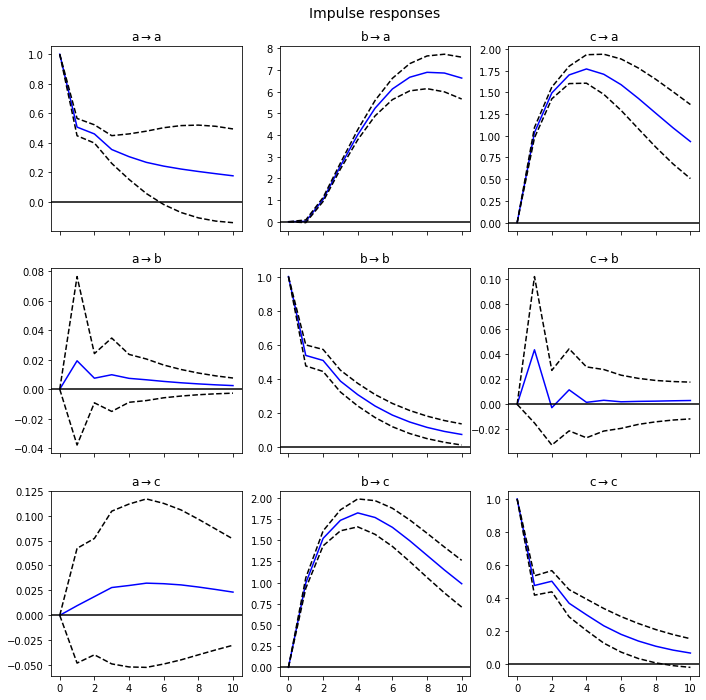

In [71]:
results = model.fit(2)
irf = results.irf(10)
irf.plot(orth=False)
pyplot.show()

# Order the variables (list series in decreasing order of exogeneity)

 1. The series_b affects series_a
 2. The series_b affects series_c
 3. The series_c affects series_a
 
 Another way to put it will be 1. B,  2.C, and 3.A. since A does not afftect any of them.

# Whether VAR or VECM model, perform a dynamic forecast 10 steps forward and plot


Lag order = 2

Forecasted values:
[[-1.94086961e+01  5.04782855e-01 -1.36352657e+00]
 [-1.69921071e+01  5.04268965e-01 -4.43125656e-01]
 [-1.34965553e+01  3.21100470e-01  3.25424205e-01]
 [-1.00280156e+01  2.30557522e-01  7.22584183e-01]
 [-6.81496103e+00  1.37027743e-01  8.96563251e-01]
 [-4.14626340e+00  6.86378806e-02  9.24558389e-01]
 [-2.05941332e+00  1.45871085e-02  8.54337646e-01]
 [-5.44126307e-01 -2.59960476e-02  7.31998521e-01]
 [ 4.68216843e-01 -5.59691413e-02  5.84093525e-01]
 [ 1.06371569e+00 -7.77476044e-02  4.30749324e-01]]


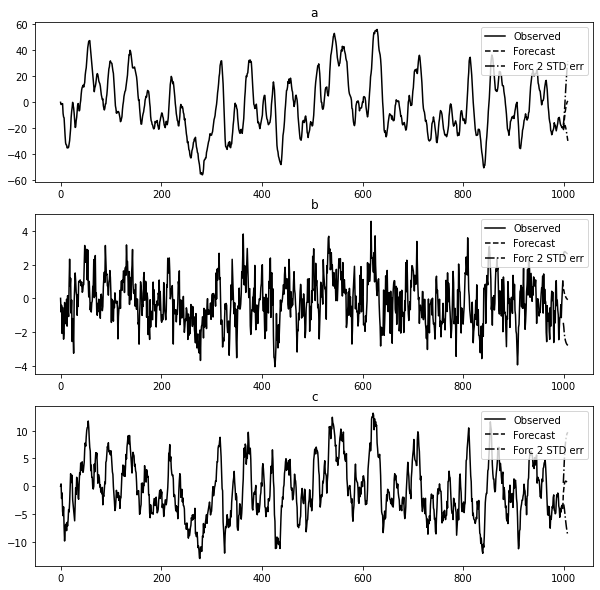

In [72]:
results = model.fit(2)
lag_order = results.k_ar
print()
print("Lag order =",lag_order)
forecast_values = results.forecast(data.values[-lag_order:],10)
print()
print('Forecasted values:')
print(forecast_values)
#plot the forecat results
results.plot_forecast(10)
pyplot.show()

(990.0, 1020.0)

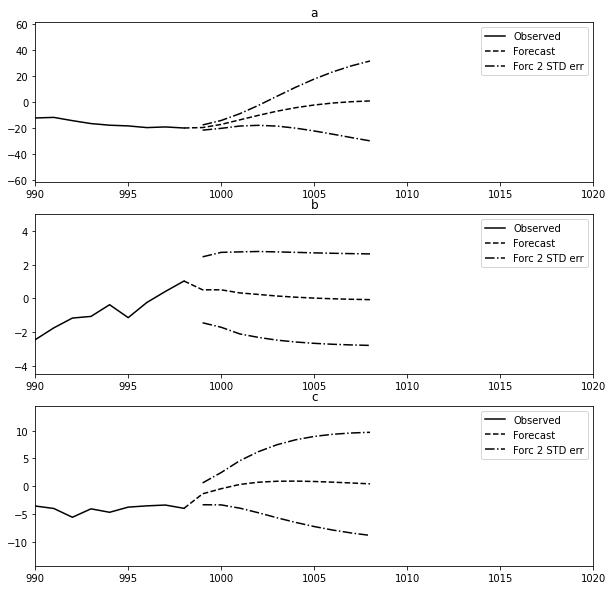

In [73]:
# plotting the forecast from the last 20 observations
results.plot_forecast(10)
plt1 = pyplot.subplot(311)
plt1.set_xlim(990,1020)
plt2 = pyplot.subplot(312)
plt2.set_xlim(990,1020)
plt2 = pyplot.subplot(313)
plt2.set_xlim(990,1020)

# Question Number 2

# Read in the series 'X.csv', 'Y.csv', 'Z.csv

In [74]:
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR

# Step 1: Read the CSV files into pandas DataFrames
X = pd.read_csv(r'C:\Users\HP\Downloads\Assignment 4\X.csv', index_col=0, parse_dates=True)
Y = pd.read_csv(r'C:\Users\HP\Downloads\Assignment 4\Y.csv', index_col=0, parse_dates=True)
Z = pd.read_csv(r'C:\Users\HP\Downloads\Assignment 4\Z.csv', index_col=0, parse_dates=True)

# Plot the data and observe

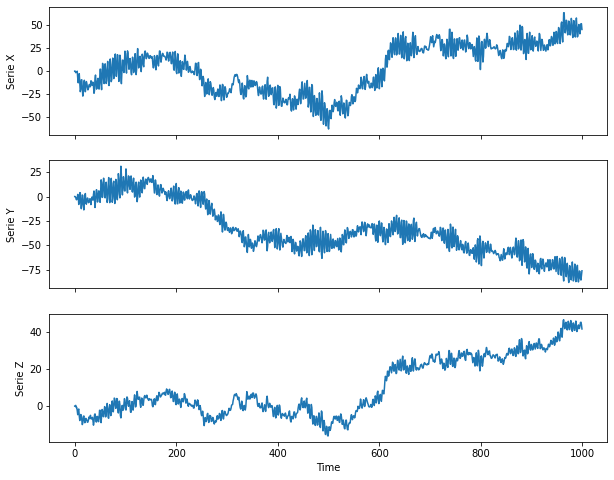

In [75]:
# plot the data
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axs[0].plot(X.index, X.values)
axs[0].set_ylabel('Serie X')

axs[1].plot(Y.index, Y.values)
axs[1].set_ylabel('Serie Y')

axs[2].plot(Z.index, Z.values)
axs[2].set_ylabel('Serie Z')

plt.xlabel('Time')
plt.show()

# DataFrame the series and create a VAR model

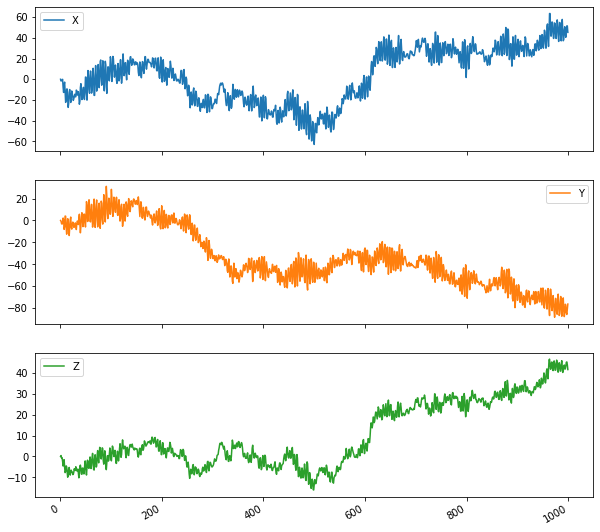

In [76]:

# Step 2: Combine the DataFrames into a single DataFrame
df = pd.concat([X, Y, Z], axis=1)
df.columns = ['X', 'Y', 'Z']
# Step 2: Remove the row with index 0
df = df.drop(0, axis=0)
# Step 3: Fit a VAR model
model_1 = VAR(df)

# Step 5: Plot the input data
df.plot(subplots=True, layout=(3, 1), figsize=(10, 10))
plt.show()

In [77]:
df.head()

,X,Y,Z
1,0.000000,0.000000,0.000000
2,-1.690123,-0.809757,0.420383
3,-1.298689,-2.972061,-0.759944
4,-0.980425,-3.376950,-0.643369
5,-0.053111,-1.642459,-2.372698


# Determine optimum lag order (p) by either:  Lag order selection

In [78]:
lag_order1 = model_1.select_order(15)
print()
print(lag_order1.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        15.65       15.67   6.264e+06       15.66
1        3.534       3.593       34.25       3.556
2     0.02397*     0.1284*      1.024*    0.06368*
3      0.03512      0.1843       1.036     0.09185
4      0.04556      0.2394       1.047      0.1193
5      0.05483      0.2934       1.056      0.1456
6      0.06650      0.3499       1.069      0.1743
7      0.07750      0.4056       1.081      0.2023
8      0.09266      0.4655       1.097      0.2345
9       0.1030      0.5206       1.109      0.2619
10      0.1032      0.5655       1.109      0.2790
11      0.1136      0.6207       1.120      0.3065
12      0.1250      0.6768       1.133      0.3349
13      0.1324      0.7289       1.142      0.3593
14      0.1417      0.7830       1.152      0.3857
15      0.1430      0.8290       1.154      0.4040
------------------------------

# Model fit at optimum lag order and get results

In [79]:
results1 = model_1.fit(2)
print()
print(results1.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, May, 2023
Time:                     13:42:51
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.143047
Nobs:                     997.000    HQIC:                 0.0790083
Log likelihood:          -4242.85    FPE:                    1.04054
AIC:                    0.0397376    Det(Omega_mle):         1.01893
--------------------------------------------------------------------
Results for equation X
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.064298         0.053279           -1.207           0.228
L1.X          0.703221         0.008199           85.766           0.000
L1.Y          0.224451         0.029622            7.577           0.000
L1.Z          2.023217

# Use results to find roots (number of roots = K*p)

In [80]:
from statsmodels.tsa.vector_ar.var_model import VARResults
nnroots = 3*2
print()
print("Root = ")
for i in range(0, nnroots):
    print(VARResults.roots(results1)[i])
print()
print('Moduli =')
for i in range(0, nnroots):
    print(np.absolute(VARResults.roots(results1)[i]))


Root = 
(21.584667872755173-0j)
(2.2959059812068885-0j)
(0.28859818593551795+0.9886264932875738j)
(0.28859818593551795-0.9886264932875738j)
(1.0042413039062343-0j)
(0.9992418846919574-0j)

Moduli =
21.584667872755173
2.2959059812068885
1.0298889533126165
1.0298889533126165
1.0042413039062343
0.9992418846919574


From the moduli we can see that the absolute values are all not greater than 1 so we can say that they are not stationary as a group since since 4 of the variables are not greater 1. So they are cointegrated since some are equals to one.

# Perform a Johansen cointegration test. What is the cointegration rank?

In [81]:
from statsmodels.tsa.vector_ar.vecm import *
import warnings

warnings.filterwarnings("ignore")
lag_order = select_order(df, maxlags=10, deterministic='cn')
print(lag_order.summary())
print("AIC lag order =", lag_order.aic)
print()

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        3.530       3.589       34.12       3.553
1     0.01922*     0.1233*      1.019*    0.05879*
2      0.03005      0.1787       1.031     0.08658
3      0.04053      0.2338       1.041      0.1140
4      0.04959      0.2874       1.051      0.1400
5      0.06060      0.3430       1.062      0.1680
6      0.07130      0.3983       1.074      0.1957
7      0.08628      0.4579       1.090      0.2276
8      0.09622      0.5125       1.101      0.2545
9      0.09582      0.5566       1.101      0.2711
10      0.1065      0.6119       1.112      0.2987
--------------------------------------------------
AIC lag order = 1



In [85]:
# Cointegration rank
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

rank_test = select_coint_rank(df, 0,1, method='trace', signif=0.05)
print(rank_test)
print()
print('Rank =', rank_test.rank)
print()

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          791.5          29.80
  1   3          2.585          15.49
-------------------------------------

Rank = 1



# Create a VECM model (with no deterministic terms) and fit
# What are the a and b matrices?

In [86]:
from statsmodels.tsa.vector_ar.vecm import VECM
warnings.filterwarnings("ignore")

# Assuming you have the data and the `lag_order` and `rank_test` variables
model = VECM(df, deterministic="cn", seasons=0, 
             k_ar_diff=lag_order.aic, 
             coint_rank=rank_test.rank)
vecm_res = model.fit()

print(vecm_res.summary())
print()
print('Alpha:')
print(vecm_res.alpha)
print('Standard error on alpha:')
print(vecm_res.stderr_alpha)
# print(vecm_res.beta)
print("Beta =")
print(vecm_res.beta)
print()

Det. terms outside the coint. relation & lagged endog. parameters for equation X
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.X           0.5314      0.027     19.665      0.000       0.478       0.584
L1.Y          -0.1870      0.017    -10.943      0.000      -0.221      -0.154
L1.Z           0.3653      0.077      4.774      0.000       0.215       0.515
Det. terms outside the coint. relation & lagged endog. parameters for equation Y
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.X           0.3405      0.026     12.919      0.000       0.289       0.392
L1.Y           0.2365      0.017     14.187      0.000       0.204       0.269
L1.Z          -0.4886      0.075     -6.548      0.000      -0.635      -0.342
Det. terms outside the coint. relation & lagged 

# Whether VAR or VECM model, perform a dynamic forecast 10 steps forward and plot

forecast:
[[ 39.96137358 -75.91109221  42.3485193 ]
 [ 43.03127685 -81.98746452  44.03724159]
 [ 49.82730013 -85.58792344  44.17523024]
 [ 50.68574524 -81.76340175  42.66632981]
 [ 44.77003198 -76.26202178  41.71944788]]
lower:
[[ 37.97141081 -77.85206129  40.39132457]
 [ 38.36095431 -86.51100837  40.64454037]
 [ 41.34013907 -91.87094253  40.04167782]
 [ 40.41697788 -88.56201919  38.3047609 ]
 [ 34.18310163 -83.87082751  37.1586508 ]]
upper:
[[ 41.95133635 -73.97012313  44.30571403]
 [ 47.70159939 -77.46392067  47.42994281]
 [ 58.3144612  -79.30490434  48.30878265]
 [ 60.95451261 -74.96478431  47.02789873]
 [ 55.35696234 -68.65321606  46.28024497]]


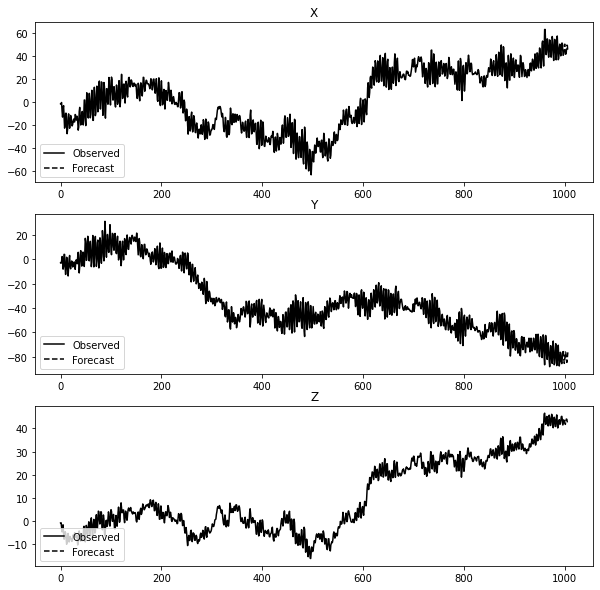

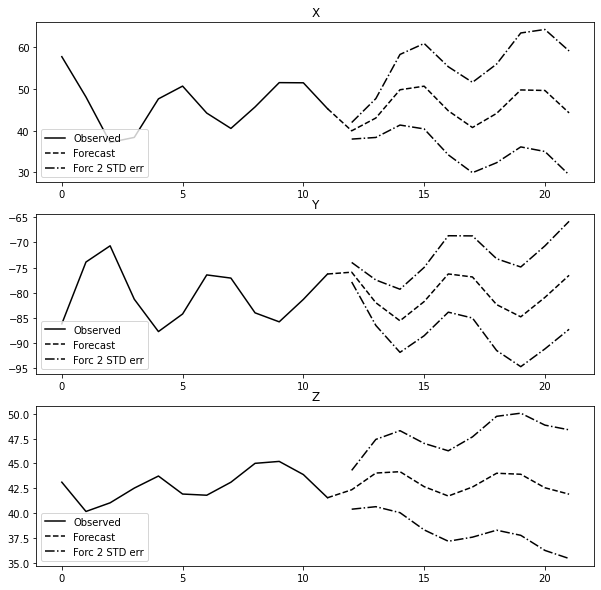

In [87]:
vecm_res.predict(steps=5, alpha=0.05)
for text, values in zip(('forecast', 'lower', 'upper'),
                        vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", values, sep='\n')
vecm_res.plot_forecast(steps=10, plot_conf_int=False)
#plotting the forecast from the last 12 observations
vecm_res.plot_forecast(steps=10, n_last_obs=12)
plt.show()